EM算法练习  
说明：  
1.写代码时请先读完整体代码，了解整体思路和结构后再进行编程  
2.同学们可以阅读当前目录下的pdf文档，里面有关于本次任务的讲解  
3.代码的其他部分不需要更改，只需填充上所给出的代码块，否则会影响评判。  
  <b>需要填空的地方格式如下：  </b>  
  \###### start ######  

  \######  end  ######

In [11]:
import numpy as np                               # import numpy 
from numpy.linalg import inv                     # for matrix inverse 
import matplotlib.pyplot as plt                  # import matplotlib.pyplot for plotting framework 
from scipy.stats import multivariate_normal      # 生成pdf(Probability density function)
import random

In [12]:
miu1 = [1,1] # 真实均值1
miu2 = [7,7] # 真实均值2                                            
cov1 = [[3, 2], [2, 3]] #协方差矩阵1，维度为2*2                                      
cov2 = [[2, -1], [-1 , 2]] #协方差矩阵2，维度为2*2  
np.random.seed(100) # 设置随机种子，保证每次运行结果相同
random.seed(100)
data1 = np.random.multivariate_normal(miu1, cov1, size=(200,))   # 为每个均值和协方差生成 200 个样本,服从多元正态分布（m1, cov1），维度为200,2
data2 = np.random.multivariate_normal(miu2, cov2, size=(200,))   # 为每个均值和协方差生成 200 个样本,服从多元正态分布（m2, cov2），维度为200,2
data = np.concatenate((data1, data2), axis=0)# 所有样本，维度为400*2，第一列为坐标x,第二列为坐标y

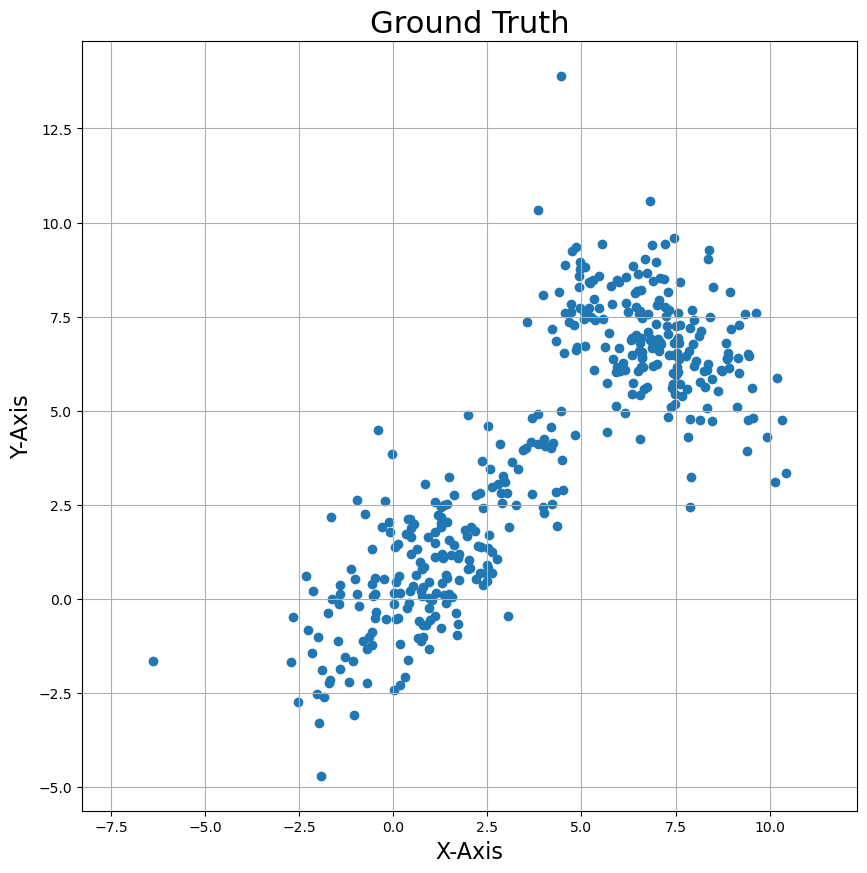

In [13]:
plt.figure(figsize=(10,10))                                  
plt.scatter(data[:,0], data[:,1], marker='o')      
plt.axis('equal')                                   
plt.xlabel('X-Axis', fontsize=16)               
plt.ylabel('Y-Axis', fontsize=16)                      
plt.title('Ground Truth', fontsize=22)     
plt.grid()             
plt.show()# 坐标服从两种不同的多元正态分布，因此图像显示出两种聚类

In [14]:
# 对参数进行初步猜测
miu1 = random.choice(data) #从样本中随机选取一个作为μ1
miu2 = random.choice(data) #从样本中随机选取一个作为μ2
cov1 = np.cov(np.transpose(data)) # np.cov():给定数据和权重，估计协方差矩阵。返回变量的协方差矩阵，维度为2*2
cov2 = np.cov(np.transpose(data)) 
pi = 0.5
cov1 == cov2 #一开始得到的两个协方差矩阵基于所有数据得到，因此相等


array([[ True,  True],
       [ True,  True]])

(200, 200) (200, 200) (200, 200, 2)


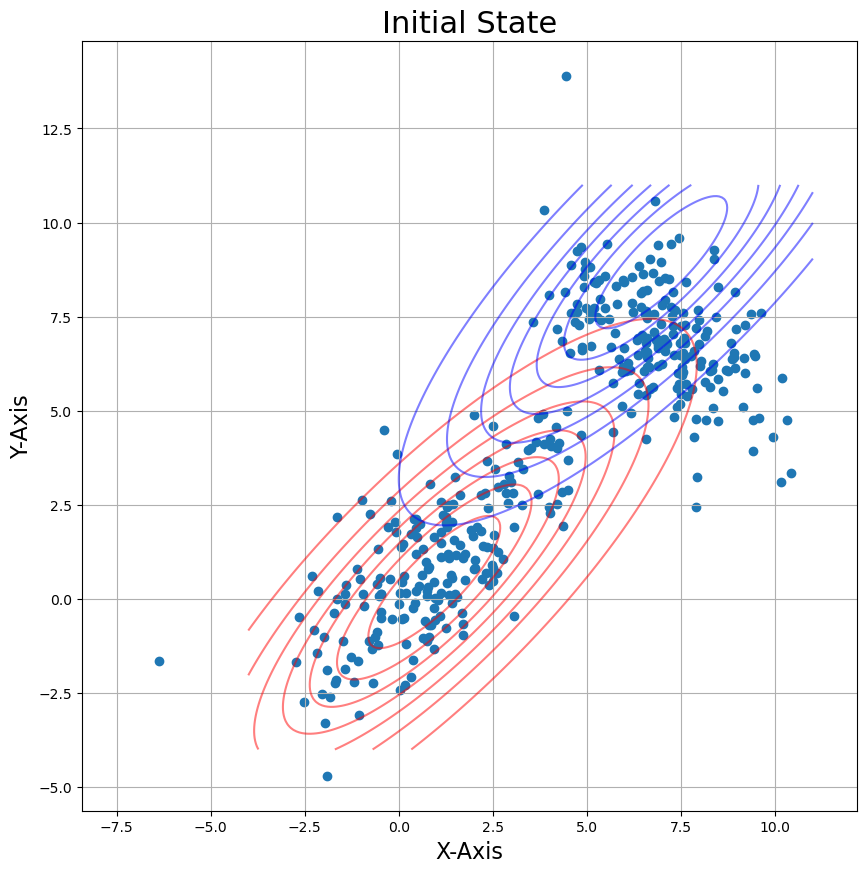

In [15]:
x1 = np.linspace(-4,11,200)   #-4到11，200个点
x2 = np.linspace(-4,11,200)   #-4到11，200个点
X, Y = np.meshgrid(x1,x2) # 生成(200, 200)的坐标点  X表示横坐标, Y表示纵坐标


Z1 = multivariate_normal(miu1, cov1)  # 定义高斯模型  
Z2 = multivariate_normal(miu2, cov2)  # 定义高斯模型

pos = np.empty((X.shape[0], X.shape[1], 2)) # 给定形状和类型的新数组，不初始化条目
print(X.shape, Y.shape, pos.shape)
pos[:, :, 0] = X; pos[:, :, 1] = Y # 将X坐标和Y坐标赋值给pos

plt.figure(figsize=(10,10)) # 创建图形并分配大小
plt.scatter(data[:,0], data[:,1], marker= 'o') # 把样本点画出来 
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) #基于初始正态分布函数1，绘制等高线1
plt.contour(X, Y, Z2.pdf(pos), colors="b" , alpha = 0.5) #基于初始正态分布函数2，绘制等高线2
plt.axis('equal') # 使两个轴相等
plt.xlabel('X-Axis', fontsize=16) # X-Axis
plt.ylabel('Y-Axis', fontsize=16) # Y-Axis
plt.title('Initial State' , fontsize=22) # 绘图标题
plt.grid() # 显示网格线
plt.show()

![info1](./info1.png)

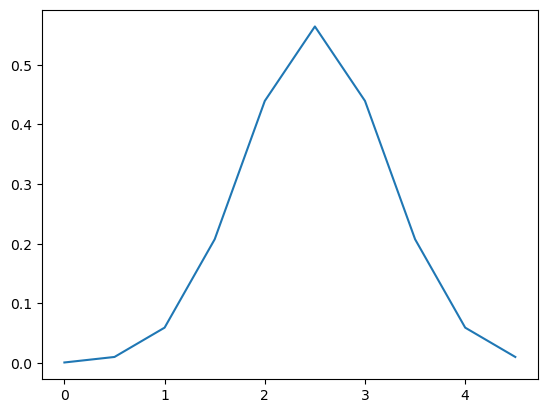

In [16]:
#tip:使用函数multivariate_normal.pdf()生成均值为μ，方差为∑的多元概率密度函数, 输出的值为概率值
x = np.linspace(0, 5, 10, endpoint=False) # 样本
y = multivariate_normal.pdf(x, mean=2.5, cov=.5) # 样本的概率密度函数
plt.plot(x, y)

In [17]:
##Expectation step
def Estep(lis1, data): 
    miu1=lis1[0] # 第一类样本的μ
    miu2=lis1[1] # 第二类样本的μ
    cov1=lis1[2] # 第一类样本的协方差矩阵
    cov2=lis1[3] # 第二类样的协方差矩阵
    pi=lis1[4] # pi1
    
    ###### start ######  
    Normal_Distribution_prob1 = multivariate_normal.pdf(data , miu1, cov1) # 计算样本数据类一的概率 output.shape=(400,1) 提示：使用multivariate_normal.pdf函数
    Normal_Distribution_prob2 = multivariate_normal.pdf(data, miu2, cov2) # 计算样本数据类二的概率 output.shape=(400,1) 提示：使用multivariate_normal.pdf函数
    ######  end  ######
    
    w1 = pi * Normal_Distribution_prob1
    w2 = (1-pi) * Normal_Distribution_prob2
    
    ###### start ######  
    r1 = w1/(w1+w2)  #每个数据点由类1生成的概率
    ######  end  ######
    
    return r1

In [21]:
## Maximization step
def Mstep(r1, data):
    r1_xn_num,N1_temp,r2_xn_num,N2_temp=0,0,0,0
    for n in range(0,len(data)):
        ###### start ######  
        r1_xn_num += r1[n] * data[n]
        N1_temp += r1[n] 
        
        r2_xn_num += (1-r1[n])*data[n]
        N2_temp += 1-r1[n]
        ######  end  ######
        
    miu1 = r1_xn_num/N1_temp  #新的μ1
    miu2 = r2_xn_num/N2_temp  #新的μ2
    sum1,N1_temp,sum2,N2_temp=0,0,0,0
    for n in range(0,len(data)):

        xn_sub_miu1 = np.matrix(data[n]-miu1)
        
        ######  start  ######
        sum1 += r1[n]*np.transpose(xn_sub_miu1)*(xn_sub_miu1)
        N1_temp += r1[n]
        ######  end  ######

        xn_sub_miu2 = np.matrix(data[n]-miu2)
        
        ######  start  ######
        sum2 += (1-r1[n])*np.transpose(xn_sub_miu2)*(xn_sub_miu2)
        N2_temp += 1-r1[n]
        ######  end  ######
        
    cov1 = sum1/N1_temp  #新的协方差矩阵1
    cov2 = sum2/N2_temp #新的协方差矩阵2

    pi = sum(r1)/len(data)
    
    lis2=[miu1,miu2,cov1,cov2,pi]
    return lis2
Mstep(r1, data)

[array([1.00140422, 0.97790846]),
 array([6.95892162, 6.92204071]),
 matrix([[3.49453663, 2.55763773],
         [2.55763773, 3.6924022 ]]),
 matrix([[ 2.10196608, -0.99482462],
         [-0.99482462,  2.10134192]]),
 0.5037439433594145]

In [19]:
def plot(lis1, data, X, Y):
    miu1=lis1[0] # 第一类样本的μ
    miu2=lis1[1] # 第二类样本的μ
    cov1=lis1[2] # 第一类样本的协方差矩阵
    cov2=lis1[3] # 第二类样的协方差矩阵
    Z1 = multivariate_normal(miu1, cov1)  
    
    ######  start  ######
    Z2 = multivariate_normal(miu2, cov2)
    ######  end  ######

    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure(figsize=(10,10)) # 打印原始数据点
    plt.scatter(data[:,0], data[:,1], marker='o')     
    
    ######  start  ######
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) #基于更新的均值1和协方差矩阵1，绘制新的等高线1
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) #基于更新的均值2和协方差矩阵2，绘制新的等高线2
    ######  end  ######
    
    plt.axis('equal') # making both the axis equal
    plt.xlabel('X-Axis', fontsize=16) # X-Axis
    plt.ylabel('Y-Axis', fontsize=16) # Y-Axis
    plt.grid() # displaying gridlines
    plt.show()
    


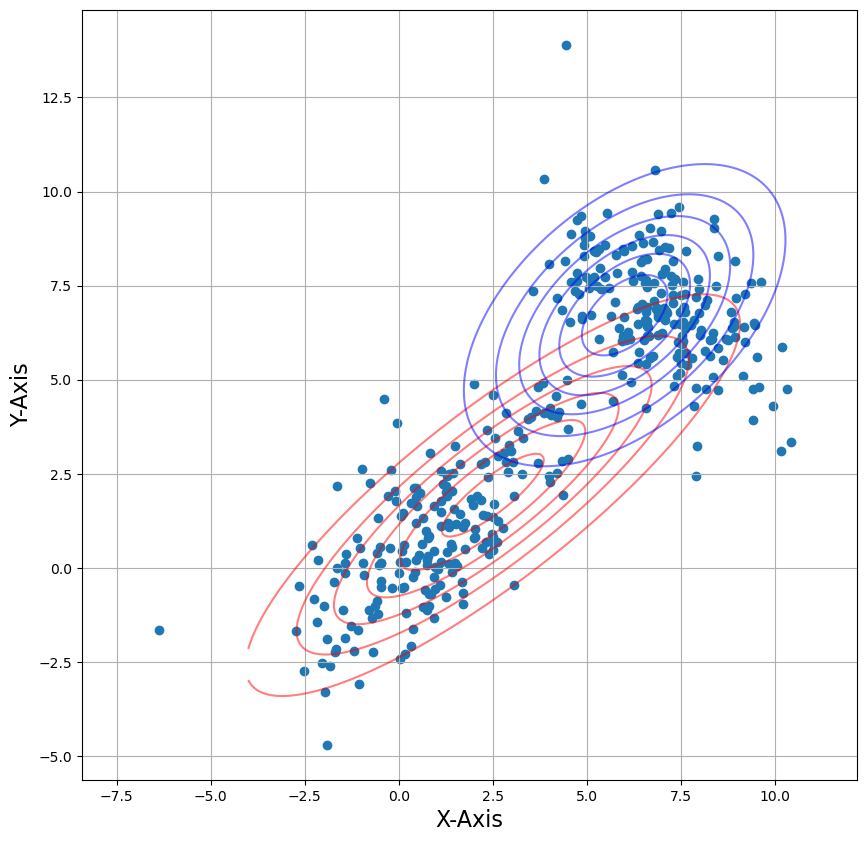

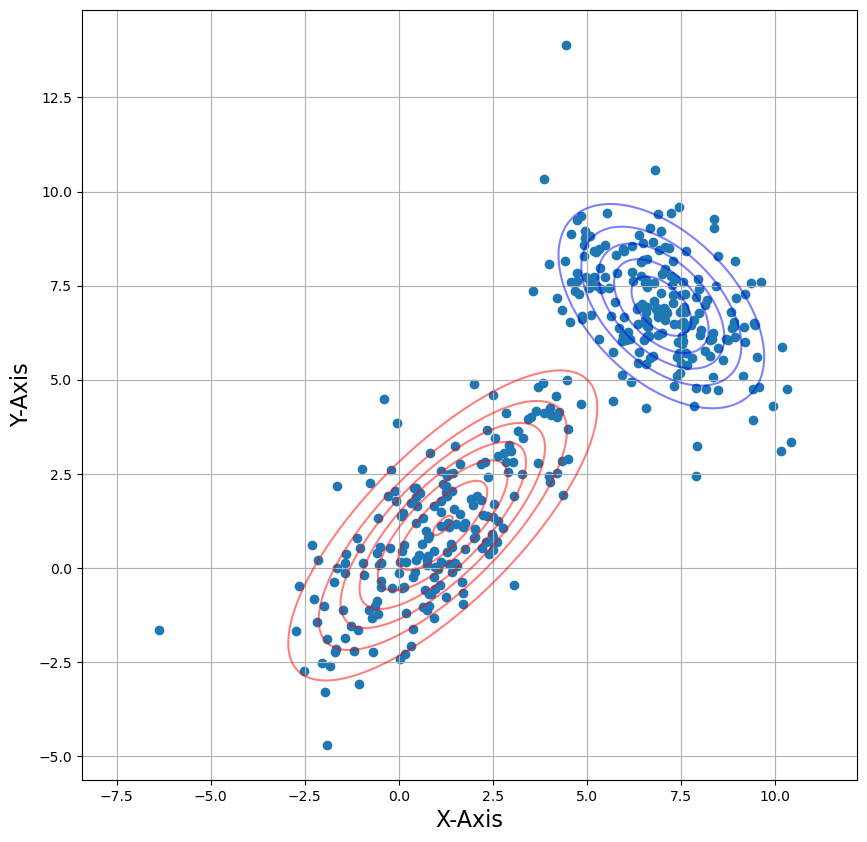

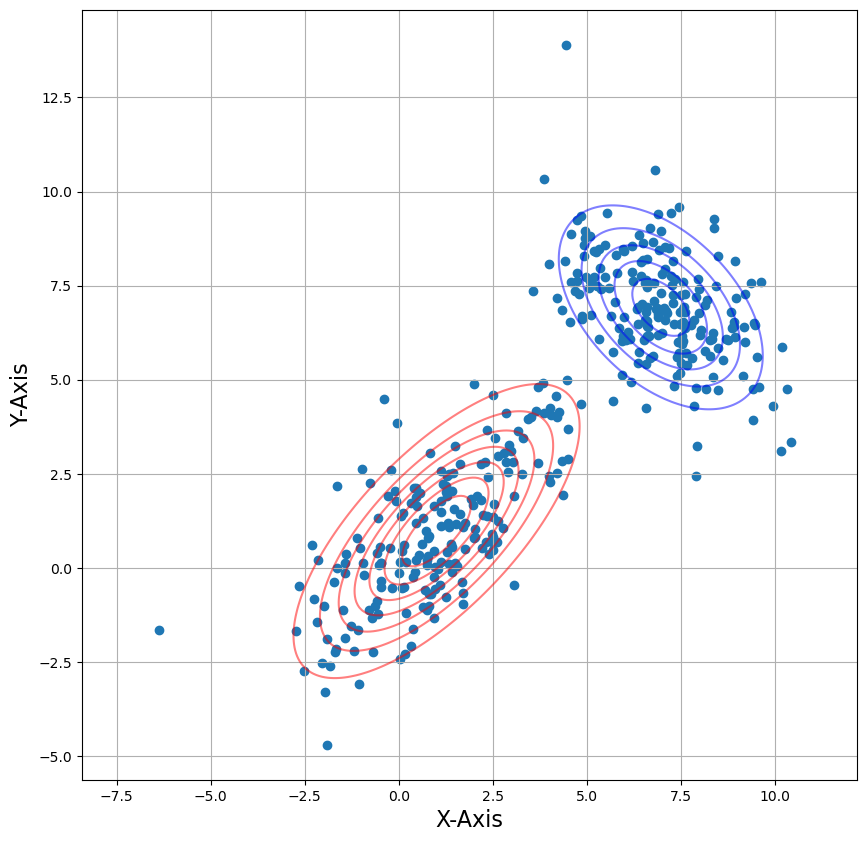

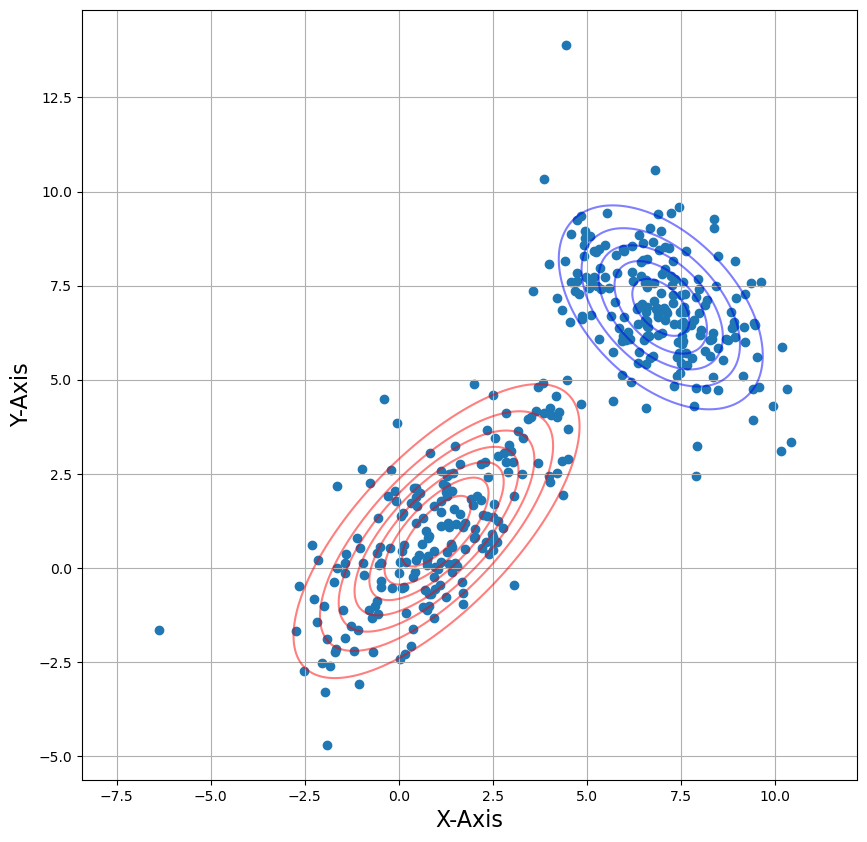

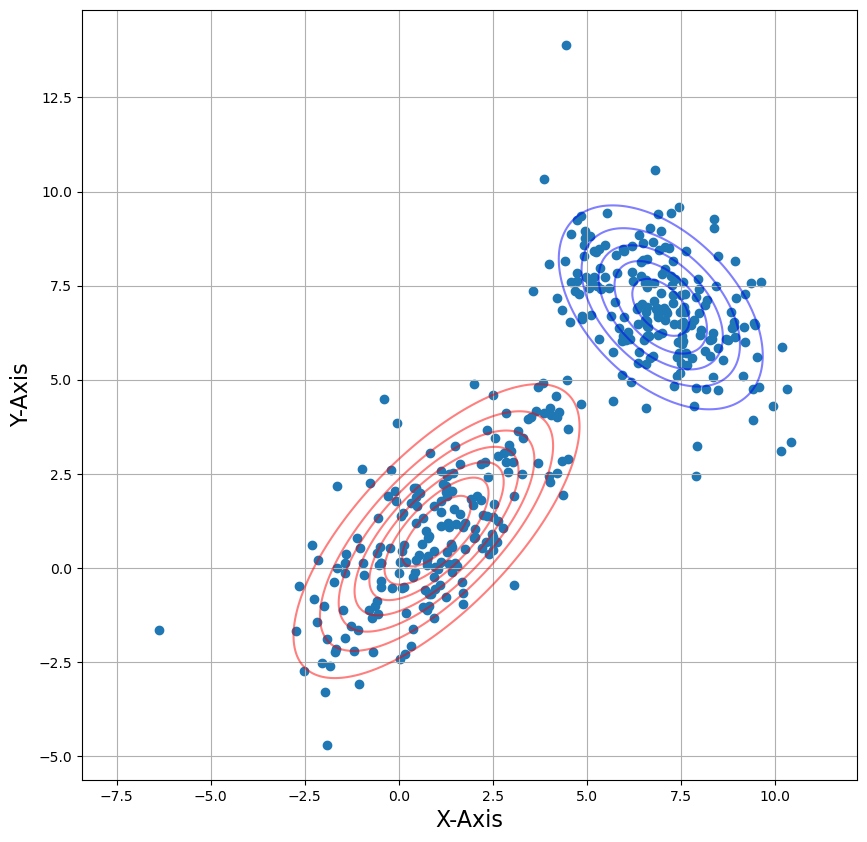

Final miu1: [1.00140422 0.97790846],
Final miu2: [6.95892162 6.92204071],
Final cov1: [[3.49453663 2.55763773]
 [2.55763773 3.6924022 ]]
, Final cov2: [[ 2.10196608 -0.99482462]
 [-0.99482462  2.10134192]],
Final pi: 0.5037439433594145


In [20]:
iterations = 20
lis1=[miu1,miu2,cov1,cov2,pi]
x1 = np.linspace(-4,11,200)   
x2 = np.linspace(-4,11,200) 
X, Y = np.meshgrid(x1,x2)
for i in range(0,iterations):
    ######  start  ######
    # Estep
    r1 = Estep(lis1,data)
    # Mstep
    lis2 = Mstep(r1,data)
    ######  end  ######
    
    lis1=lis2
    if(i==0 or i == 4 or i == 9 or i == 14 or i == 19):
        plot(lis1, data, X, Y) # 画图

# 输出最后的参数
print(f"Final miu1: {lis1[0]},\nFinal miu2: {lis1[1]},\nFinal cov1: {lis1[2]}\n, Final cov2: {lis1[3]},\nFinal pi: {lis1[4]}")